In [231]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loading datasets

In [232]:
test_df= pd.read_csv("orders.csv")
test_df= pd.read_csv("orders.csv",na_values=["Not Available","unknown"])
test_df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

### read sample data

In [142]:
test_df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [233]:

test_df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

### Rearange the columns

In [236]:
test_df.columns=test_df.columns.str.lower()


In [237]:
test_df.columns = test_df.columns.str.replace(" ", "_")
test_df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


### Discound formula

In [238]:
test_df["discount"]=test_df["list_price"]*test_df["discount_percent"]*.01
test_df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9


### Get to sale_price & profit

In [239]:
# hpw to get sale_price 
test_df["sale_price"]=test_df["list_price"]-test_df["discount"]
test_df.head()
#to get profit 
test_df["profit"]=test_df["sale_price"]-test_df["cost_price"]
test_df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


### Set date format

In [240]:
test_df.dtypes
#test_df["order_date"]=test_df.to_datetime(test_df["order_date"],format="%Y-%M-%D")
test_df["order_date"] =pd.to_datetime(test_df["order_date"], format="%Y-%m-%d")
test_df.head(3)


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5


### Drop the columns

In [241]:
print(test_df.columns)
test_df.drop(columns=["list_price", "cost_price", "discount_percent"], inplace=True, errors='ignore')

test_df.columns = test_df.columns.str.strip()
#test_df.drop(columns=["list_price","cost_price","discount_percent"],inplace=True)


Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'discount', 'sale_price', 'profit'],
      dtype='object')


In [100]:
test_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [253]:
# check the null values
print(test_df.isnull().sum())

order_id        0
order_date      0
ship_mode       6
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
product_id      0
quantity        0
discount        0
sale_price      0
profit          0
dtype: int64


In [255]:
# Drop rows where 'ship_mode' is NULL
test_df=test_df.dropna(subset=['ship_mode'])
print(test_df.isnull().sum())

order_id        0
order_date      0
ship_mode       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
product_id      0
quantity        0
discount        0
sale_price      0
profit          0
dtype: int64


In [256]:
test_df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [257]:
pip install mysql-connector-python 

Note: you may need to restart the kernel to use updated packages.


### Python to MySQL Connection 

In [258]:
import mysql.connector
from tabulate import tabulate


In [259]:
pip install pymysql


In [260]:
import pymysql

In [261]:
conection=pymysql.connect(host='localhost',user='root',password='sankarprabu9894',database='prabu')
mycursor = conection.cursor()


In [262]:
if conection:
    print("yes mysql connected")
else:
    print("not conect to mysql")

yes mysql connected


In [263]:
mycursor.execute('show databases')
for x in mycursor:
    print(x)

('employee_promotion',)
('information_schema',)
('mysql',)
('performance_schema',)
('prabu',)
('sakila',)
('sys',)
('world',)


In [264]:
pip install pandas pymysql sqlalchemy


### Python to MYSQL dada loaded

In [272]:
import os
print(os.getcwd()) 
file_path = "test_df.csv"
print(os.listdir())
test_df.to_csv("test_df.csv", index=False)  # Saves it in the current directory
from sqlalchemy import create_engine

#MySQL Connection Details
user = "root"
password = "sankarprabu9894"
host = "localhost"
database = "prabu"

#Create MySQL Engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")


df = pd.read_csv("test_df.csv")  

#Insert into MySQL table (Replace if exists)
df.to_sql("orders", con=engine, if_exists="replace", index=False)

print("python to mysql data loaded in to musql successfully ")


C:\Users\admin\Downloads\archive (7)
['.ipynb_checkpoints', 'orders.csv', 'orders.xlsx', 'project_1.ipynb', 'test_df.csv']
python to mysql data loaded in to musql successfully 


### Check column and data type 

In [266]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9988 non-null   int64         
 1   order_date    9988 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   object        
 3   segment       9988 non-null   object        
 4   country       9988 non-null   object        
 5   city          9988 non-null   object        
 6   state         9988 non-null   object        
 7   postal_code   9988 non-null   int64         
 8   region        9988 non-null   object        
 9   category      9988 non-null   object        
 10  sub_category  9988 non-null   object        
 11  product_id    9988 non-null   object        
 12  quantity      9988 non-null   int64         
 13  discount      9988 non-null   float64       
 14  sale_price    9988 non-null   float64       
 15  profit        9988 non-null   float64      

<Figure size 1200x600 with 0 Axes>

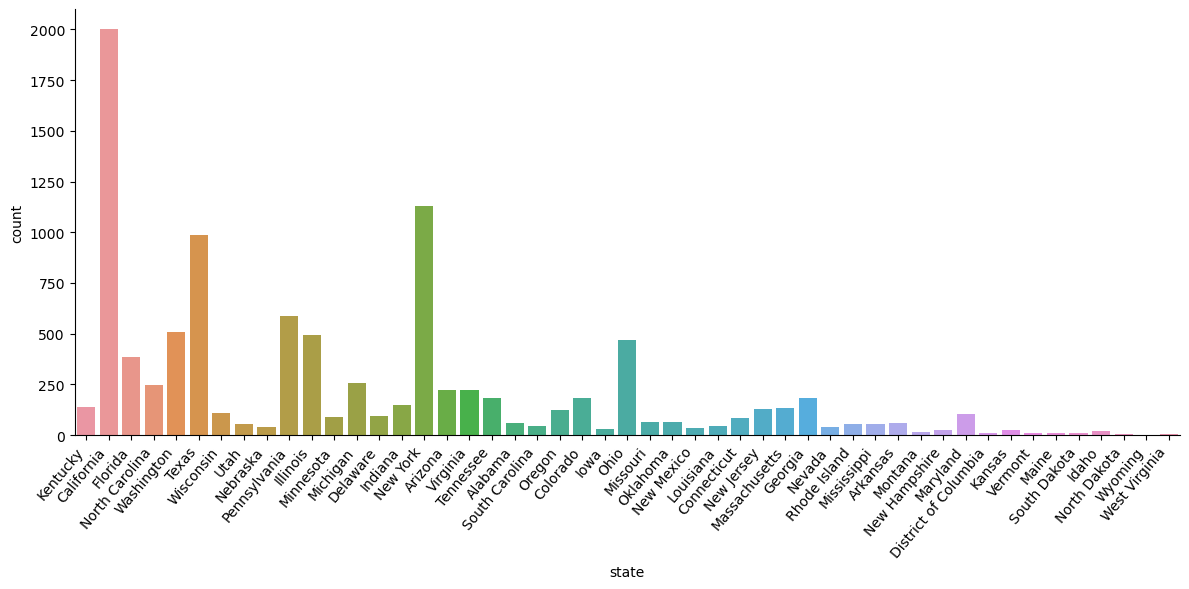

In [252]:

plt.figure(figsize=(12, 6))  

sns.catplot(x="state", kind="count", data=test_df, height=6, aspect=2) 
plt.tight_layout()  

plt.show()

### Get the top 5 states with highest counts,Plot Pie Chart

Text(0.5, 1.0, 'Top 5 States by Count')

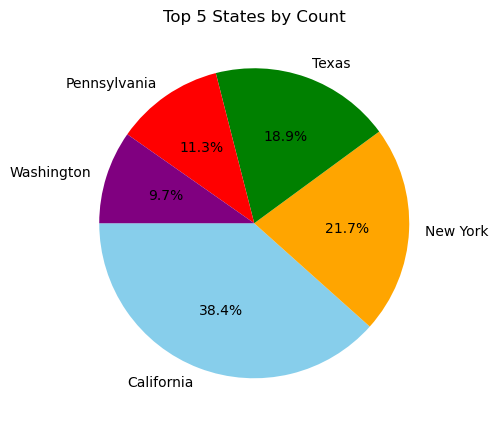

In [268]:

top_states = test_df["state"].value_counts().nlargest(5)

# Plot Pie Chart
plt.figure(figsize=(5, 6))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=180, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

# Title
plt.title("Top 5 States by Count")


### Profit Distribution by state(TOP 10)

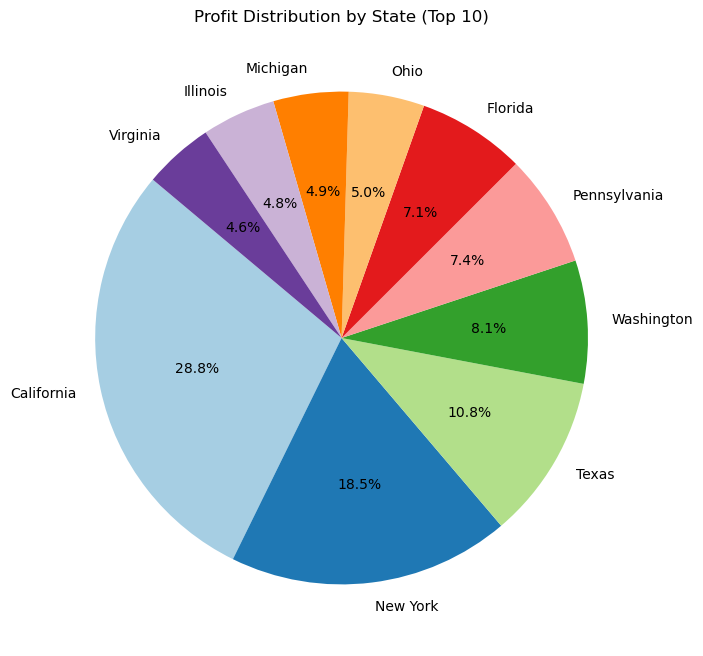

In [269]:

# Aggregate profit by state
state_profit = test_df.groupby("state")["profit"].sum()

# Sort and take the top 10 states (optional)
top_states_profit = state_profit.nlargest(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_states_profit, labels=top_states_profit.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title("Profit Distribution by State (Top 10)")
plt.show()


### Bottom 10 States by profit

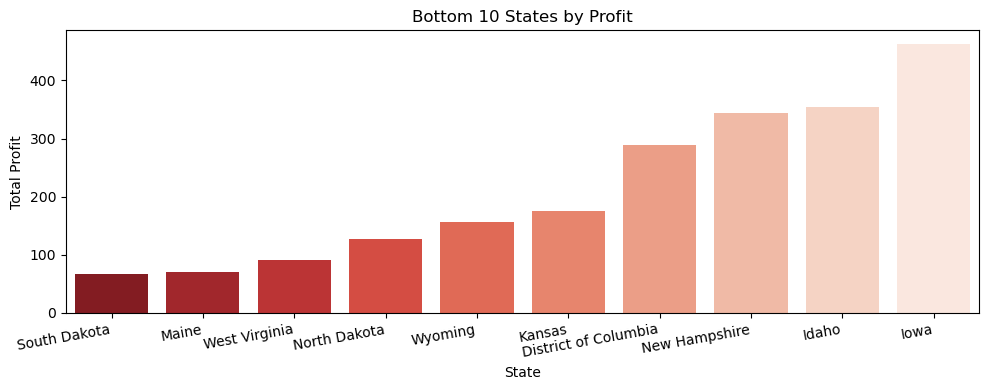

In [270]:

# Group by state and sum profit, then get the bottom 10 states
bottom_10_states = test_df.groupby("state")["profit"].sum().nsmallest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=bottom_10_states.index, y=bottom_10_states.values, palette="Reds_r")
# Format
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Bottom 10 States by Profit")
plt.xticks(rotation=10, ha="right")
plt.tight_layout()

# Show plot
plt.show()


### Top 10 Cities by Quantity Ordered

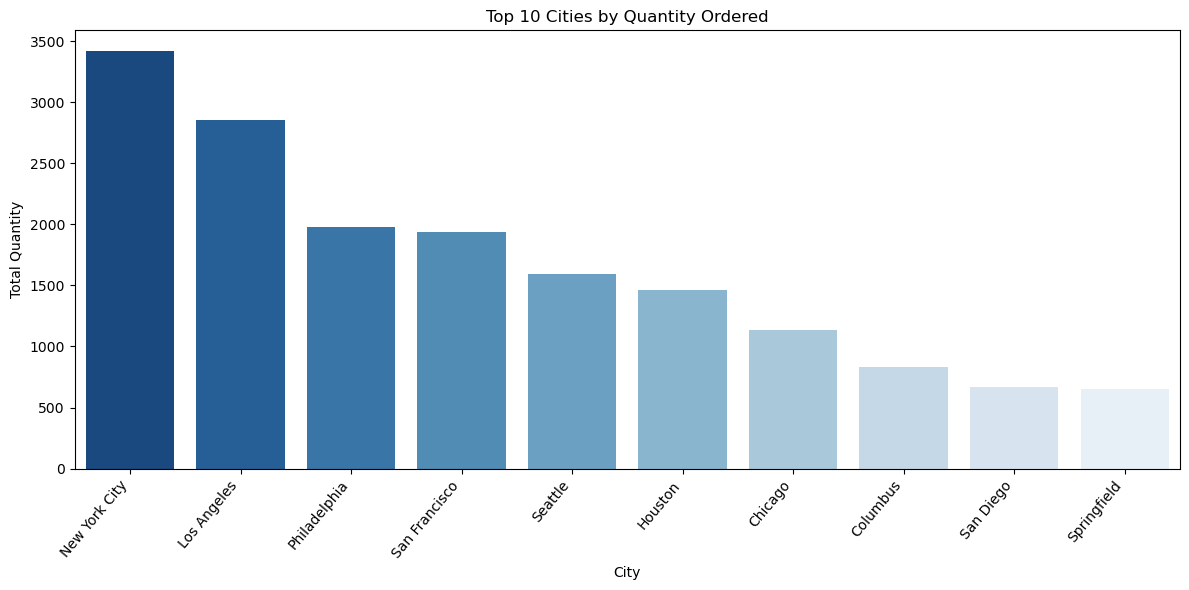

In [271]:
# Group by city and sum quantity
city_quantity = test_df.groupby("city")["quantity"].sum().nlargest(10)  # Top 10 cities with highest quantity

plt.figure(figsize=(12, 6))
sns.barplot(x=city_quantity.index, y=city_quantity.values, palette="Blues_r")

# Format
plt.xlabel("City")
plt.ylabel("Total Quantity")
plt.title("Top 10 Cities by Quantity Ordered")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()

# Show plot
plt.show()
